In [1]:
# import des modules

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA


In [2]:
# Ouverture des datasets

df1=pd.read_csv('sentiment_values_v2.csv')
df2=pd.read_csv('context_content_features.csv',usecols=range(0, 22))
df3=pd.read_csv('user_track_hashtag_timestamp.csv')


In [3]:
# Supression données inutiles

df2=df2.drop(['coordinates','place','geo','time_zone','artist_id','tweet_lang','created_at','lang','user_id','id'],axis=1)
df2=df2.dropna()
df2=df2.set_index('track_id')


In [4]:
# affichage du dataset qui servira au clustering

df2.head(5)

,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key
track_id,,,,,,,,,,,
cd52b3e5b51da29e5893dba82a418a4b,0.004790,0.1800,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,1.0,6.0
da3110a77b724072b08f231c9d6f7534,0.017700,0.0638,0.0624,0.769,0.752,-8.252,95.862,0.26700,0.826,1.0,7.0
ba84d88c10fb0e42d4754a27ead10546,0.000000,0.0860,0.0436,0.675,0.775,-4.432,97.030,0.21700,0.885,0.0,1.0
33f95122281f76e7134f9cbea3be980f,0.000000,0.1430,0.0292,0.324,0.333,-5.647,74.101,0.23900,0.574,1.0,7.0
b5c42e81e15cd54b9b0ee34711dedf05,0.000183,0.3620,0.0524,0.767,0.808,-5.011,114.237,0.03640,0.739,0.0,10.0


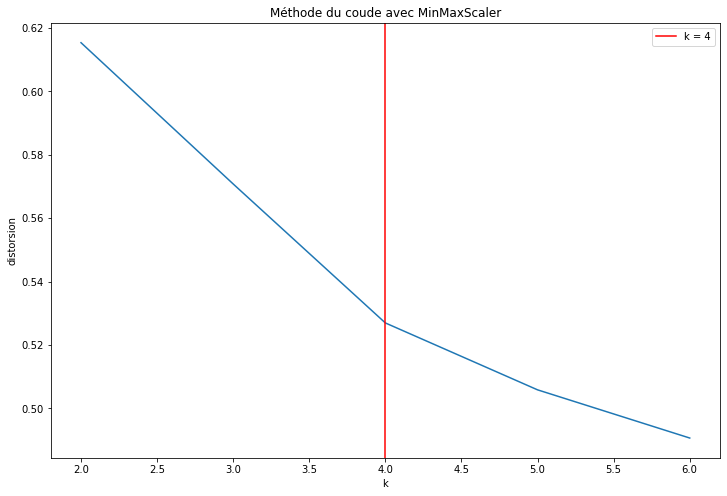

In [5]:
# Méthode du coude avec Min Max Scaler

scaler=MinMaxScaler().fit(df2)
df2_scaled=pd.DataFrame(scaler.transform(df2),index=df2.index,columns=df2.columns)

k_value=[2,3,4,5,6]

disto=[]

for k in k_value:
    clusters=KMeans(n_clusters=k)
    clusters.fit(df2_scaled)
    disto.append(sum(np.min(cdist(df2_scaled,clusters.cluster_centers_,'euclidean'),axis=1))/np.size(df2_scaled,axis=0))


plt.figure(figsize=(12,8))
plt.plot(k_value,disto)
plt.axvline(x=4,color='red',label='k = 4')
plt.xlabel('k')
plt.ylabel('distorsion')
plt.title('Méthode du coude avec MinMaxScaler')
plt.legend()

Text(0.5, 1.0, 'Méthode du coude avec StandardScaler')

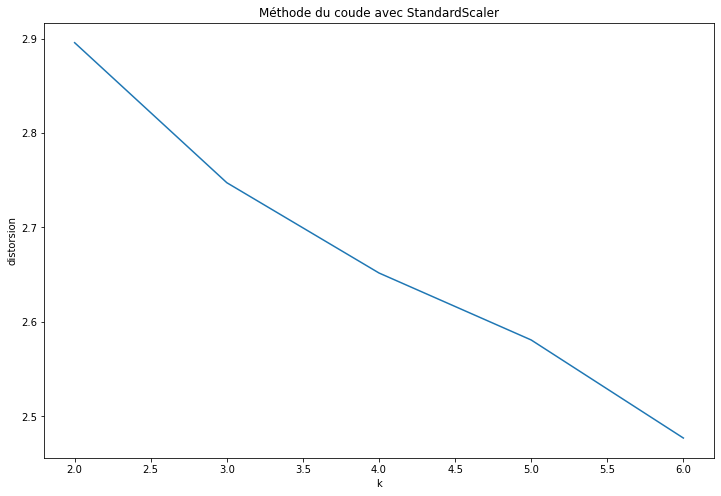

In [6]:
#Méthode du coude avec Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler2=StandardScaler().fit(df2)
df2_scaled2=pd.DataFrame(scaler2.transform(df2),columns=df2.columns,index=df2.index)

k_value2=[2,3,4,5,6]

disto2=[]

for k in k_value2:
    clusters=KMeans(n_clusters=k)
    clusters.fit(df2_scaled2)
    disto2.append(sum(np.min(cdist(df2_scaled2,clusters.cluster_centers_,'euclidean'),axis=1))/np.size(df2_scaled2,axis=0))

plt.figure(figsize=(12,8))
plt.plot(k_value2,disto2)
plt.xlabel('k')
plt.ylabel('distorsion')
plt.title('Méthode du coude avec StandardScaler')


On choisit le scaler MinMax et 4 clusters

In [7]:
# Appication de KMeans

kmeans=KMeans(n_clusters=4)
kmeans.fit(df2_scaled)

labels=kmeans.labels_



In [8]:
pd.DataFrame(labels).value_counts()



1    3763724
0    3386729
3    2929663
2    1529767
dtype: int64

C:\Users\Caolan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de morceaux par labels')

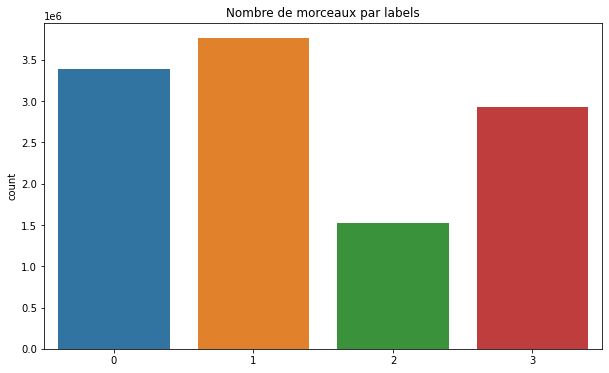

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(labels).set_title('Nombre de morceaux par labels')


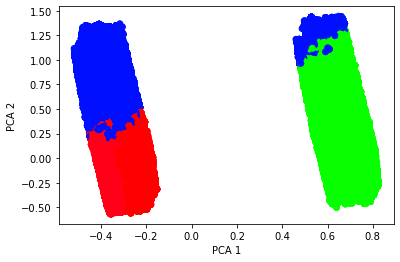

In [10]:
# Evaluation du modèle avec une PCA

pca=PCA(n_components=2)
pca.fit(df2_scaled)
df2_pca=pca.transform(df2_scaled)
plt.scatter(df2_pca[:,0],df2_pca[:,1],c=labels,cmap='hsv')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [11]:
df2_scaled.head()

,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key
track_id,,,,,,,,,,,
cd52b3e5b51da29e5893dba82a418a4b,0.004795,0.174444,0.008268,0.625092,0.341993,0.782658,0.434709,0.000351,0.696994,1.0,0.545455
da3110a77b724072b08f231c9d6f7534,0.017718,0.057457,0.043248,0.766468,0.751998,0.784343,0.298260,0.268072,0.825997,1.0,0.636364
ba84d88c10fb0e42d4754a27ead10546,0.000000,0.079807,0.023320,0.668028,0.774998,0.853553,0.303721,0.217871,0.884998,0.0,0.090909
33f95122281f76e7134f9cbea3be980f,0.000000,0.137193,0.008056,0.300450,0.332993,0.831540,0.196510,0.239960,0.573992,1.0,0.636364
b5c42e81e15cd54b9b0ee34711dedf05,0.000183,0.357677,0.032648,0.764373,0.807998,0.843063,0.384178,0.036546,0.738995,0.0,0.909091


C:\Users\Caolan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA à 2 Dimensions')

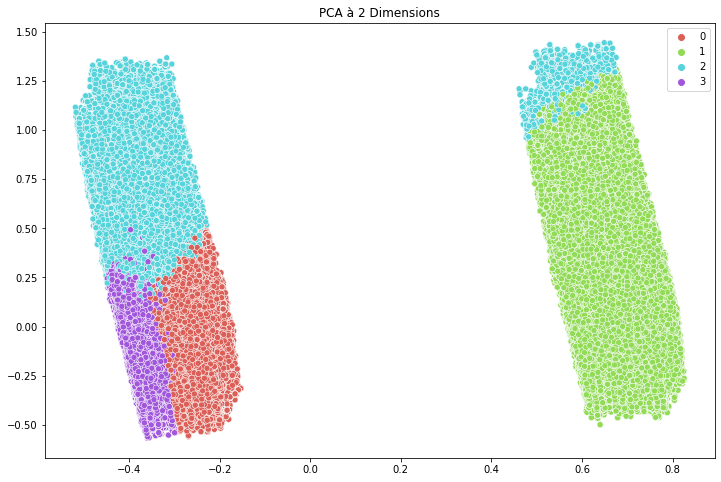

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(df2_pca[:,0],df2_pca[:,1],hue=labels,palette=sns.color_palette('hls',4),legend='full').set_title('PCA à 2 Dimensions')




In [13]:
pca.explained_variance_ratio_

array([0.35004137, 0.17317444])